# Task 1

# TASK 1A: EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import re
import random
import string
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ODI-adapted2.csv', sep=';')

In [3]:
df = df.rename(columns={'Tijdstempel': 'send_date', 'What programme are you in?': 'program', 'Have you taken a course on machine learning?': 
                        'taken_machine_learning_course', 'Have you taken a course on information retrieval?': 'taken_information_retrieval_course', 
                        'Have you taken a course on statistics?': 'taken_statistics_course', 'Have you taken a course on databases?': 
                        'taken_database_course', 'What is your gender?': 'gender', 'I have used ChatGPT to help me with some of my study assignments ': 
                        'have_used_chatgpt', 'When is your birthday (date)?': 'birthdate', 'How many students do you estimate there are in the room?':
                        'students_in_the_room_gamble', 'Did you stand up to come to your previous answer    ?': 'stood_up', 'Give a random number': 'random_number', 
                        'What is your stress level (0-100)?':'stresslevel', 'How many hours per week do you do sports (in whole hours)? ': 'hours_of_sports_week', 
                        'Time you went to bed Yesterday': 'time_to_bed', 'What makes a good day for you (1)?': 'good_day_1', 'What makes a good day for you (2)?': 
                        'good_day_2'})
df.columns

Index(['send_date', 'program', 'taken_machine_learning_course',
       'taken_information_retrieval_course', 'taken_statistics_course',
       'taken_database_course', 'gender', 'have_used_chatgpt', 'birthdate',
       'students_in_the_room_gamble', 'stood_up', 'stresslevel',
       'hours_of_sports_week', 'random_number', 'time_to_bed', 'good_day_1',
       'good_day_2'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2
0,4-4-2023 12:08:33,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23:00,good food,good sleep
2,4-4-2023 12:08:38,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,4-4-2023 12:08:52,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,23:00,Gym,Piano
4,4-4-2023 12:08:59,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,23:00,Relax,Sun


In [5]:
# Print how many rows/columns there are
df.shape

(305, 17)

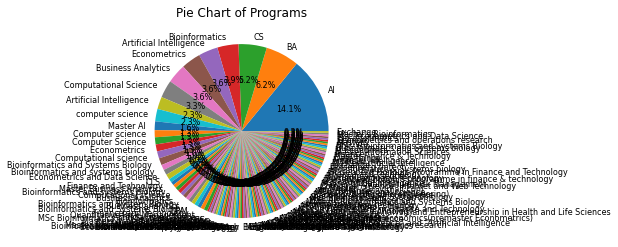

In [6]:
# count the number of occurrences of each program in the program column
program_counts = df['program'].value_counts()

# create a pie chart of the program counts with smaller labels
plt.pie(program_counts, labels=program_counts.index, autopct='%1.1f%%', textprops={'fontsize': 8})

# add title
plt.title('Pie Chart of Programs')

# show the plot
plt.show()

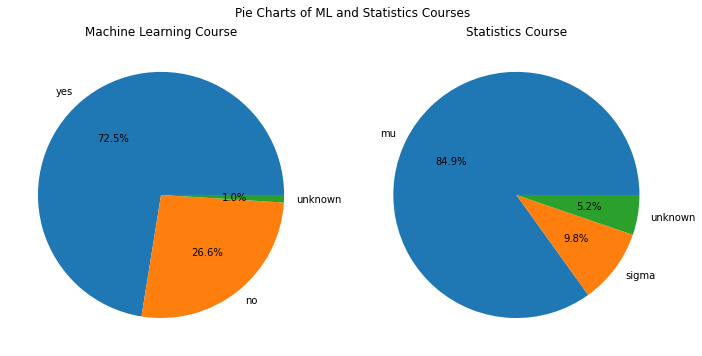

In [7]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the pie chart of the taken_machine_learning_course column in the left subplot
ml_counts = df['taken_machine_learning_course'].value_counts()
axs[0].pie(ml_counts, labels=ml_counts.index, autopct='%1.1f%%')
axs[0].set_title('Machine Learning Course')

# plot the pie chart of the taken_statistics_course column in the right subplot
stats_counts = df['taken_statistics_course'].value_counts()
axs[1].pie(stats_counts, labels=stats_counts.index, autopct='%1.1f%%')
axs[1].set_title('Statistics Course')

# add overall title to the plot
fig.suptitle('Pie Charts of ML and Statistics Courses')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [8]:
# create a regular expression pattern to match all values referring to AI
pattern1 = r'(.*Artificial Intelligence.*|.*AI.*|.*Ai.*|.*Artificial.*|.*Artifscial Intelligense.*)'
pattern2 = r'(.*CS.*|.*Computer Science.*|.*Computer science.*|.*Masters cs.*|.*computer science.*)'
pattern3 = r'(.*Bioinformatics.*|.*Systems Biology.*|.*Bio-informatics.*|.*bioinformatics.*|.*Bionformatics.*)'
pattern16 = r'(.*operations research.*|.*& Operations Research.*)'
pattern4 = r'(.*Econometrics(?! and Operations Research).*|.*Econometrics MSc.*)'
pattern5 = r'(.*Business Analytics.*|.*Master Business Analytics.*|.*BA.*|.*business analytics.*|.*Business analytics.*)'
pattern6 = r'(.*PhD.*)'
pattern7 = r'(.*Biomedical Sciences.*|.*Biomedical sciences.*)'
pattern8 = r'(.*Human Language Technology.*)'
pattern9 = r'(.*computational.*|.*Computational Science.*|.*Computational.*)'
pattern10 = r'(.*Information Sciences.*)'
pattern11 = r'(.*Human language.*)'
pattern12 = r'(.*Finance and Technology.*|.*finance and technology.*|.*Finance & Technology.*|.*fintech.*|.*FinTech.*|.*finance & technology.*)'
pattern13 = r'(.*Finance.*|.*Economics.*)'
pattern14 = r'(.*Digital Business and Innovation.*)'
pattern15 = r'(.*Quantitative Risk Management.*|.*QRM.*)'
pattern17 = r'(.*exchange.*|.*Exchange.*)'

# replace all values matching the pattern with "AI" in the program column
df['program'].replace(pattern1, 'Artificial Intelligence', regex=True, inplace=True)
df['program'].replace(pattern2, 'Computer Science', regex=True, inplace=True)
df['program'].replace(pattern3, 'Bioinformatics and Systems Biology', regex=True, inplace=True)
df['program'].replace(pattern16, 'Econometrics and Operations Research', regex=True, inplace=True)
df['program'].replace(pattern4, 'Econometrics', regex=True, inplace=True)
df['program'].replace(pattern5, 'Business Analytics', regex=True, inplace=True)
df['program'].replace(pattern6, 'PhD', regex=True, inplace=True)
df['program'].replace(pattern7, 'Biomedical Sciences', regex=True, inplace=True)
df['program'].replace(pattern8, 'Human Language Technology', regex=True, inplace=True)
df['program'].replace(pattern9, 'Computational Science', regex=True, inplace=True)
df['program'].replace(pattern10, 'Information Sciences', regex=True, inplace=True)
df['program'].replace(pattern11, 'Human Language Technology', regex=True, inplace=True)
df['program'].replace(pattern12, 'Finance and Technology', regex=True, inplace=True)
df['program'].replace(pattern13, 'Finance', regex=True, inplace=True)
df['program'].replace(pattern14, 'Digital Business and Innovation', regex=True, inplace=True)
df['program'].replace(pattern15, 'Quantitative Risk Management', regex=True, inplace=True)
df['program'].replace(pattern17, 'Exchange', regex=True, inplace=True)

In [9]:
# Plot unique values for programs 
len(df['program'].unique())

28

In [10]:
# List of unwanted values
unwanted_values = ['aryamaan710@gmail.com', '116', 'CLS', 'Exchange', 'Hyperbolic Time Chamber', 'High school 3rd grade', 'Data thingy']

# Replace unwanted values with NaN
df['program'] = df['program'].replace(unwanted_values, np.nan)

In [11]:
Get the three most frequent values in the column
top_three_values = df['program'].value_counts().head(3).index.tolist()

# Replace NaN values with random choice among the top three values
df['program'] = df['program'].fillna(pd.Series(np.random.choice(top_three_values, size=len(df['program'].index))))


SyntaxError: invalid syntax (<ipython-input-11-d41b023a53ae>, line 1)

In [ ]:
# Plot unique values for programs 
df['program'].unique()

# TASK 1B: DATA CLEANING


Clean the student gamble column

In [ ]:
# Clean the gamble on amount of students in the room by removi
for i in range(len(df['students_in_the_room_gamble'])):
    try:
        df['students_in_the_room_gamble'][i] = pd.to_numeric(df['students_in_the_room_gamble'][i], errors='raise')
    except:
        df['students_in_the_room_gamble'][i] = np.nan

gamble = np.asarray(df['students_in_the_room_gamble'])

In [ ]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['students_in_the_room_gamble'] - np.mean(df['students_in_the_room_gamble'])) / np.std(df['students_in_the_room_gamble']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['students_in_the_room_gamble'][z_scores > threshold] = np.mean(df['students_in_the_room_gamble'])

In [ ]:
# calculate the mean value of the 'students_in_the_room_gamble' column
mean_value = np.mean(df['students_in_the_room_gamble'])

# replace NaN values with the mean value
df['students_in_the_room_gamble'] = df['students_in_the_room_gamble'].fillna(mean_value)

In [ ]:
# plot the 'students_in_the_room_gamble' column
plt.hist(df['students_in_the_room_gamble'], bins=20)
plt.title('Distribution of Students in the Room Gamble')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.show()

Clean the stress level column

In [ ]:
# Clean the gamble on amount of students in the room by removi
for i in range(len(df['stresslevel'])):
    try:
        df['stresslevel'][i] = pd.to_numeric(df['stresslevel'][i], errors='raise')
    except:
        df['stresslevel'][i] = np.nan

In [ ]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['stresslevel'] - np.mean(df['stresslevel'])) / np.std(df['stresslevel']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['stresslevel'][z_scores > threshold] = np.mean(df['stresslevel'])

In [ ]:
# set a range of 0 to 100 for the stresslevel, and replace outliers with the median (mean was outside of max and min due to outliers)
min_value = 0
max_value = 100

median_value = np.median(df['stresslevel'])

replace_value = min_value if median_value < min_value else max_value if median_value > max_value else median_value
df['stresslevel'] = np.where((df['stresslevel'] < min_value) | (df['stresslevel'] > max_value), replace_value, df['stresslevel'])

In [ ]:
# replace NaN values with a random value between 0 and 100
df['stresslevel'] = df['stresslevel'].apply(lambda x: np.random.randint(0, 101) if pd.isna(x) else x)

In [ ]:
plt.hist(df['stresslevel'], bins=20)
plt.title('Stresslevel')
plt.xlabel('Stresslevel')
plt.ylabel('Frequency')
plt.show()

Clean the amount of hours per week of sports column

In [ ]:
# Clean the gamble on amount of students in the room by replacing every value that cannot be transformed to numeric to nan
for i in range(len(df['hours_of_sports_week'])):
    try:
        df['hours_of_sports_week'][i] = pd.to_numeric(df['hours_of_sports_week'][i], errors='raise')
    except:
        df['hours_of_sports_week'][i] = np.nan
    
    # If the amount of sports in hours is smaller than 0, set to nan
    if df['hours_of_sports_week'][i] < 0:
        df['hours_of_sports_week'][i] = np.nan    

In [ ]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['hours_of_sports_week'] - np.mean(df['hours_of_sports_week'])) / np.std(df['hours_of_sports_week']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['hours_of_sports_week'][z_scores > threshold] = np.mean(df['hours_of_sports_week'])

In [ ]:
# calculate the mean value of the 'students_in_the_room_gamble' column
mean_value = np.mean(df['hours_of_sports_week'])

# replace NaN values with the mean value
df['hours_of_sports_week'] = df['hours_of_sports_week'].fillna(mean_value)

In [ ]:
# plot the 'students_in_the_room_gamble' column
plt.hist(df['hours_of_sports_week'], bins=20)
plt.title('Hours of sports of students')
plt.xlabel('Hours of sports')
plt.ylabel('Frequency')
plt.show()

Cleaning the time to bed column

In [ ]:
print(np.asarray(df['time_to_bed']))

In [ ]:
try:
  df['time_to_bed'] = pd.to_datetime(df['time_to_bed'], format='%H:%M').dt.time
except:
  pass

In [ ]:
time_pattern = r"^(0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]$"

valid_times = [time for time in df['time_to_bed'] if re.match(time_pattern, time)]
mean_time = pd.Series(valid_times).apply(lambda x: pd.to_datetime(x, format='%H:%M')).mean().strftime('%H:%M')

# Replace each value that does not match the pattern with the mean time value
df['time_to_bed'] = df['time_to_bed'].apply(lambda x: mean_time if not re.match(time_pattern, x) else x)


In [ ]:
print(np.asarray(df['time_to_bed']))

Cleaning the date of birth column, extracting the year of birth to a new column

In [ ]:
df['year_of_birth'] = df['birthdate'].str.extract(r'(\d{4})')
df['year_of_birth'].unique()

Clean the good_day_1 and good_day_2 column of punctuation marks for further analysis 

In [ ]:
def _remove_punctuation(x):
    # Remove punctuation marks (excluding whitespace) using regular expressions
    clean_text = re.sub(rf"[{string.punctuation}]","", str(x))
    return clean_text

df['good_day_1'] = df['good_day_1'].apply(_remove_punctuation)
df['good_day_2'] = df['good_day_2'].apply(_remove_punctuation)

# TASK 1C: FEATURE ENGINEERING

Creating age column

In [ ]:
def _extract_age(x):
    try:
        return 2023 - int(x)
    except:
        return 0

df['age'] = df['year_of_birth'].apply(_extract_age)


In [ ]:
df.head()

In [ ]:
# convert the 'year_of_birth' column to numerical format
df['year_of_birth'] = pd.to_numeric(df['year_of_birth'], errors='coerce')

In [ ]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['year_of_birth'] - np.mean(df['year_of_birth'])) / np.std(df['year_of_birth']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['year_of_birth'][z_scores > threshold] = np.median(df['year_of_birth'])

In [ ]:
# fill missing values with the mean value of the column
median_birth_year = int(df['year_of_birth'].median())
# Choose median, because mean was 

In [ ]:
df['year_of_birth'] = df['year_of_birth'].fillna(median_birth_year)

In [ ]:
print(np.asarray(df['year_of_birth']))

Analysing the good_day_1 and 2 column , to examine the possible general category 

In [ ]:
df['good_day_1'].unique()

In [ ]:
import nltk
# run below only once to download the wordnet if not present on system
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer


In [ ]:
# In this example, we use the WordNet ontology to find synsets (sets of synonyms) for each word in the group of words. 
# We then check each lemma (a specific word form) in each synset to see if it matches any of the related terms for each hobby category. 
# We keep a count of how many matches each category has, and choose the category with the most matches as the predicted category.

# Preprocess the group of words to be classified
# words_to_classify = "I love making lasagna"
# preprocessed_words = [word.lower() for word in words_to_classify.split()]

def _extract_category(x):
    try:
        # The keys in below dictionary is a generic categorical aspect of life to which the text entered by user in the good day column is mapped
        # The values are list of words that are mapped to the category
        generic_category = {
            "weather": ["warm", "weather", "sunny", "skies", "sun", "air", "sunset"],
            "socializing" : ["friend","sex", "family", "people", "love", "person", "socializing", "gossiping", "company", "relationship", "you", "alone", "cat", "dog"],
            "food" : ["meal", "coffee", "tea", "food", "breakfast", "bread", "eat", "oatmeal","snacks", "pizza", "lunch", "cake", "cook", "bake", "grill"],
            "drinking": ["wine", "beer",  "drink","alcohol"],
            "vacation": ["holiday", "free time", "leisure", "vacation", "weekend", "friday", "saturday", "sunday"],
            "relaxation" : ["sleep", "sleeping", "nap", "rest", "relax", "experience", "no", "stress","fun", "mood", "nothing", "chill", "free"],
            "entertainment" : ["tv", "netflix", "music", "cricket", "ashes", "video", "game","movie", "reading", "read", "paint", "draw", "sketch"], 
            "productivity" :["work", "done","productive", "code", "morning", "routine", "timetable", "results", "winning", "progress", "grade", "money", "successful", "productivity"],
            "physical_exercise" : ["yoga", "football", "gym","sports", "active", "workout", "bike", "hike", "travel"]
        }

        x = x.strip()
        preprocessed_words = [word.lower() for word in x.split()]


        # Map the preprocessed words to a category using the WordNet ontology
        category_counts = {}
        for word in preprocessed_words:
            # get all the synonyms for the word from wordnet
            synsets = wn.synsets(word)
            for synset in synsets:
                # for each lemma / root form of sysnonmy check if it exists in the list corresponding to each generic_category key
                for lemma in synset.lemmas():
                    for category, related_terms in generic_category.items():
                        if lemma.name() in related_terms:
                            category_counts[category] = category_counts.get(category, 0) + 1

        # Choose the hobby category with the most matches
        predicted_category = max(category_counts, key=category_counts.get)
        return predicted_category
    except:
        return "NA"

In [ ]:
df['good_things_1'] = df['good_day_1'].apply(_extract_category)
df['good_things_1'].value_counts()

In [ ]:
df['good_things_2'] = df['good_day_2'].apply(_extract_category)
df['good_things_2'].value_counts()

In [ ]:
# df[df['good_things_2'] == 'NA']['good_day_2'].tolist()

In [ ]:
df[['stresslevel', 'good_things_1','good_things_2']]

In [ ]:
# Create a frequency plot
sns.histplot(data = df['good_things_1'], kde=False)

# Set plot title and axis labels
plt.title('Distribution of good things 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Create a frequency plot
sns.histplot(data = df['good_things_2'], kde=False)

# Set plot title and axis labels
plt.title('Distribution of good things 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

Need to further 1 hot encode these for classification and regression tasks

In [ ]:
df.head()

Replace NA values for the good_things columns

In [ ]:
'''Replace NA values for good_things_1'''
df['good_things_1'] = df['good_things_1'].replace('NA', np.nan)

# find the frequency of each category in the column
freq_dict = df['good_things_1'].value_counts(normalize=True).to_dict()

# remove NaN from the dictionary
freq_dict = {k:v for k,v in freq_dict.items() if not pd.isna(k)}

# find the top 3 categories
top_categories = sorted(freq_dict, key=freq_dict.get, reverse=True)[:3]

# randomly choose one of the top 3 categories for each NaN value
df['good_things_1'] = df['good_things_1'].apply(lambda x: random.choice(top_categories) if pd.isna(x) else x)

In [ ]:
'''Replace NA values for good_things_2'''
df['good_things_2'] = df['good_things_2'].replace('NA', np.nan)

# find the frequency of each category in the column
freq_dict = df['good_things_2'].value_counts(normalize=True).to_dict()

# remove NaN from the dictionary
freq_dict = {k:v for k,v in freq_dict.items() if not pd.isna(k)}

# find the top 3 categories
top_categories = sorted(freq_dict, key=freq_dict.get, reverse=True)[:3]

# randomly choose one of the top 3 categories for each NaN value
df['good_things_2'] = df['good_things_2'].apply(lambda x: random.choice(top_categories) if pd.isna(x) else x)

In [ ]:
df.head()

Clean the age column

In [ ]:
# select the number of rows where the age is 0
num_rows = df[df['age'] == 0].shape[0]

print(num_rows)

In [ ]:
# plot a histogram of the age column
plt.hist(df['age'])

# add labels to the plot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['age'] - np.mean(df['age'])) / np.std(df['age']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['age'][z_scores > threshold] = np.mean(df['age'])

In [ ]:
# replace 0 values in the age column with the mean age
mean_age = df['age'].mean()
df['age'] = df['age'].replace(0, int(mean_age))

In [ ]:
# plot a histogram of the age column
plt.hist(df['age'])

# add labels to the plot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
# eliminating the outlier age
ages  = df[df['age'] < 100]['age']
sns.distplot(ages)


Get number of background courses as column

In [ ]:
df['taken_information_retrieval_course'] = df['taken_information_retrieval_course'].replace({'1': 'yes', '0': 'no'})
df['taken_statistics_course'] = df['taken_statistics_course'].replace({'mu': 'yes', 'sigma': 'no'})
df['taken_database_course'] = df['taken_database_course'].replace({'ja': 'yes', 'nee': 'no'})

In [ ]:
# Create the column of number of background columns
df['background_knowledge'] = df[['taken_machine_learning_course', 'taken_information_retrieval_course', 'taken_statistics_course', 'taken_database_course']].apply(lambda row: row.str.count('yes').sum(), axis=1)

In [ ]:
df.head()

In [ ]:
# Drop the original good_day_x columns
df = df.drop(['good_day_1', 'good_day_2', 'birthdate', 'year_of_birth'], axis=1)

In [ ]:
# Convert float type columns to int which should be int
df['age'] = df['age'].astype(int)

df['students_in_the_room_gamble'] = df['students_in_the_room_gamble'].astype(int)

df['hours_of_sports_week'] = df['hours_of_sports_week'].astype(int)

In [ ]:
df.head()

In [ ]:
# Move column background_knowledge to a more appropriate position
column = df.pop('background_knowledge')
new_position = 6
df.insert(new_position, 'background_knowledge', column) 

In [ ]:
df.head()